In [1]:
%matplotlib inline

In [2]:
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

# import maelstrom as ms
import numpy as np
import corner
import pandas as pd
import matplotlib.pyplot as plt
import exoplanet as xo
import pymc3 as pm

In [3]:
import numpy as np
from lightkurve import search_lightcurvefile

def get_lightcurve(target, **kwargs):
    lc_collection = search_lightcurvefile(target, **kwargs).download_all()

    lc = lc_collection[0].PDCSAP_FLUX.normalize()
    for l in lc_collection[1:]:
        lc = lc.append(l.PDCSAP_FLUX.normalize())

    lc = lc.remove_nans()
    magnitude = -2.5 * np.log10(lc.flux)
    magnitude = magnitude - np.average(magnitude)
    return lc.time, magnitude

time, mag = get_lightcurve('KIC 4168574', cadence='long')

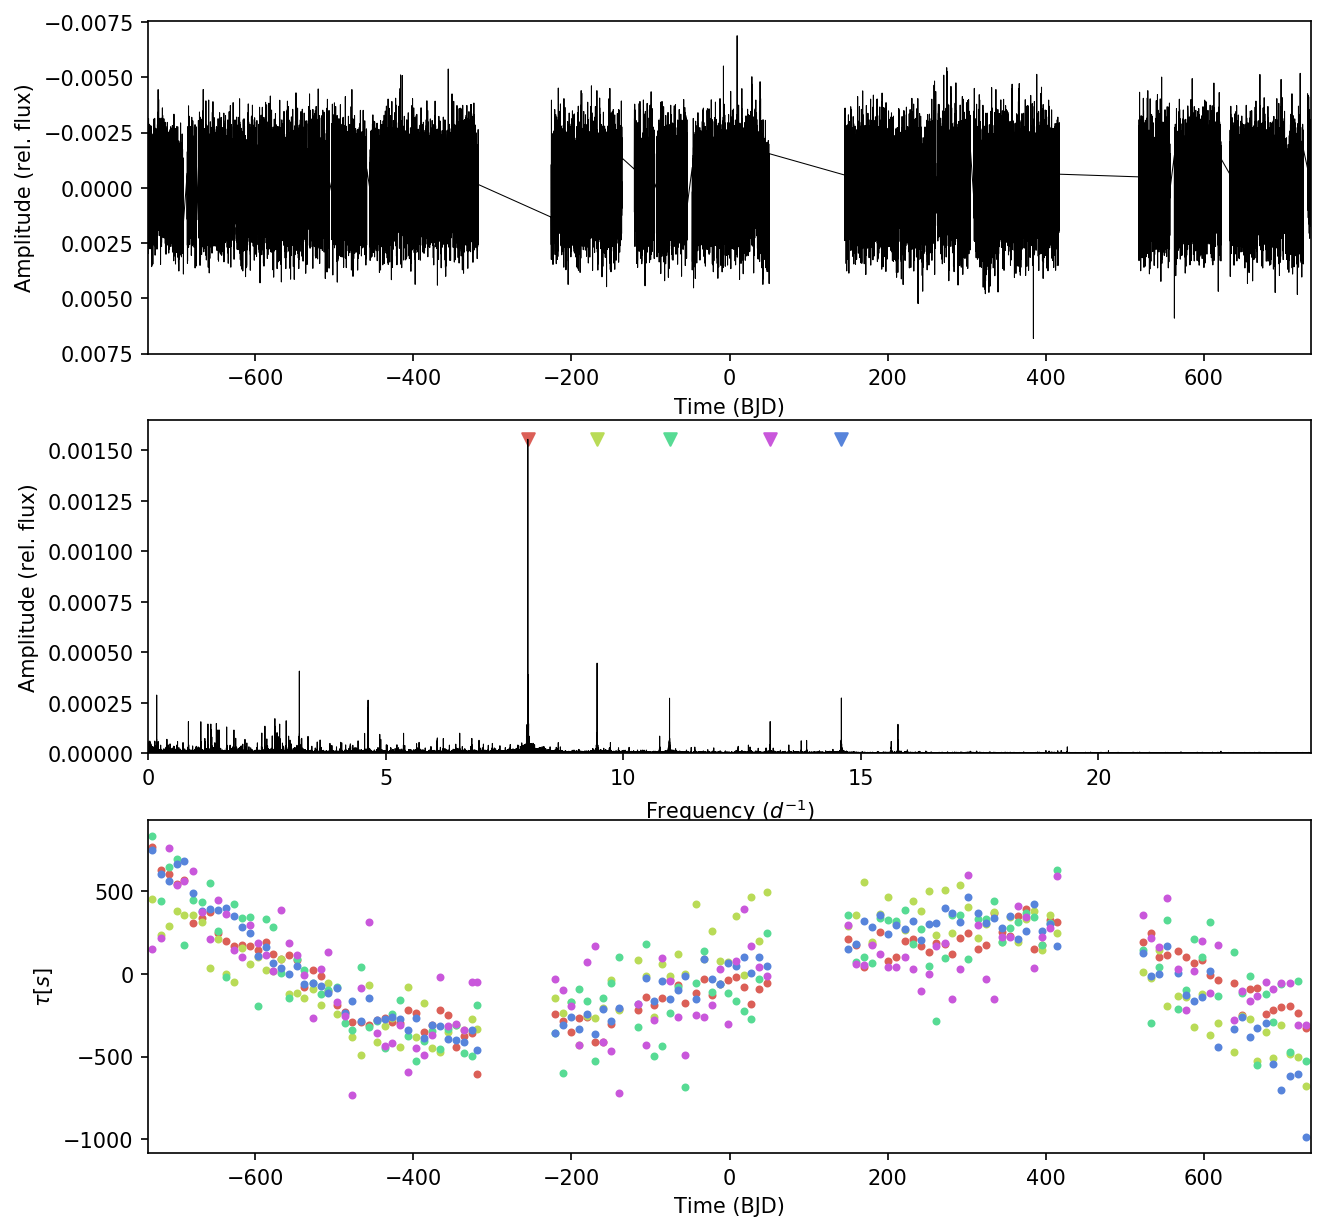

In [4]:
import maelstrom
ms = maelstrom.Maelstrom(time, mag, fmin=5, fmax=24., max_peaks=5)
ms.setup_orbit_model(period=None)
ms.first_look()
plt.show()

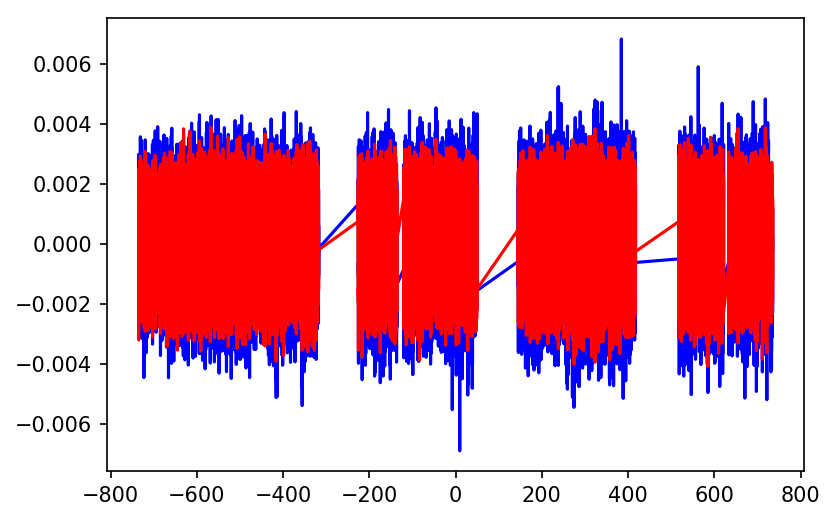

In [11]:
plt.plot(time, mag, c='b')
plt.plot(s_times, s_mags, c='r')

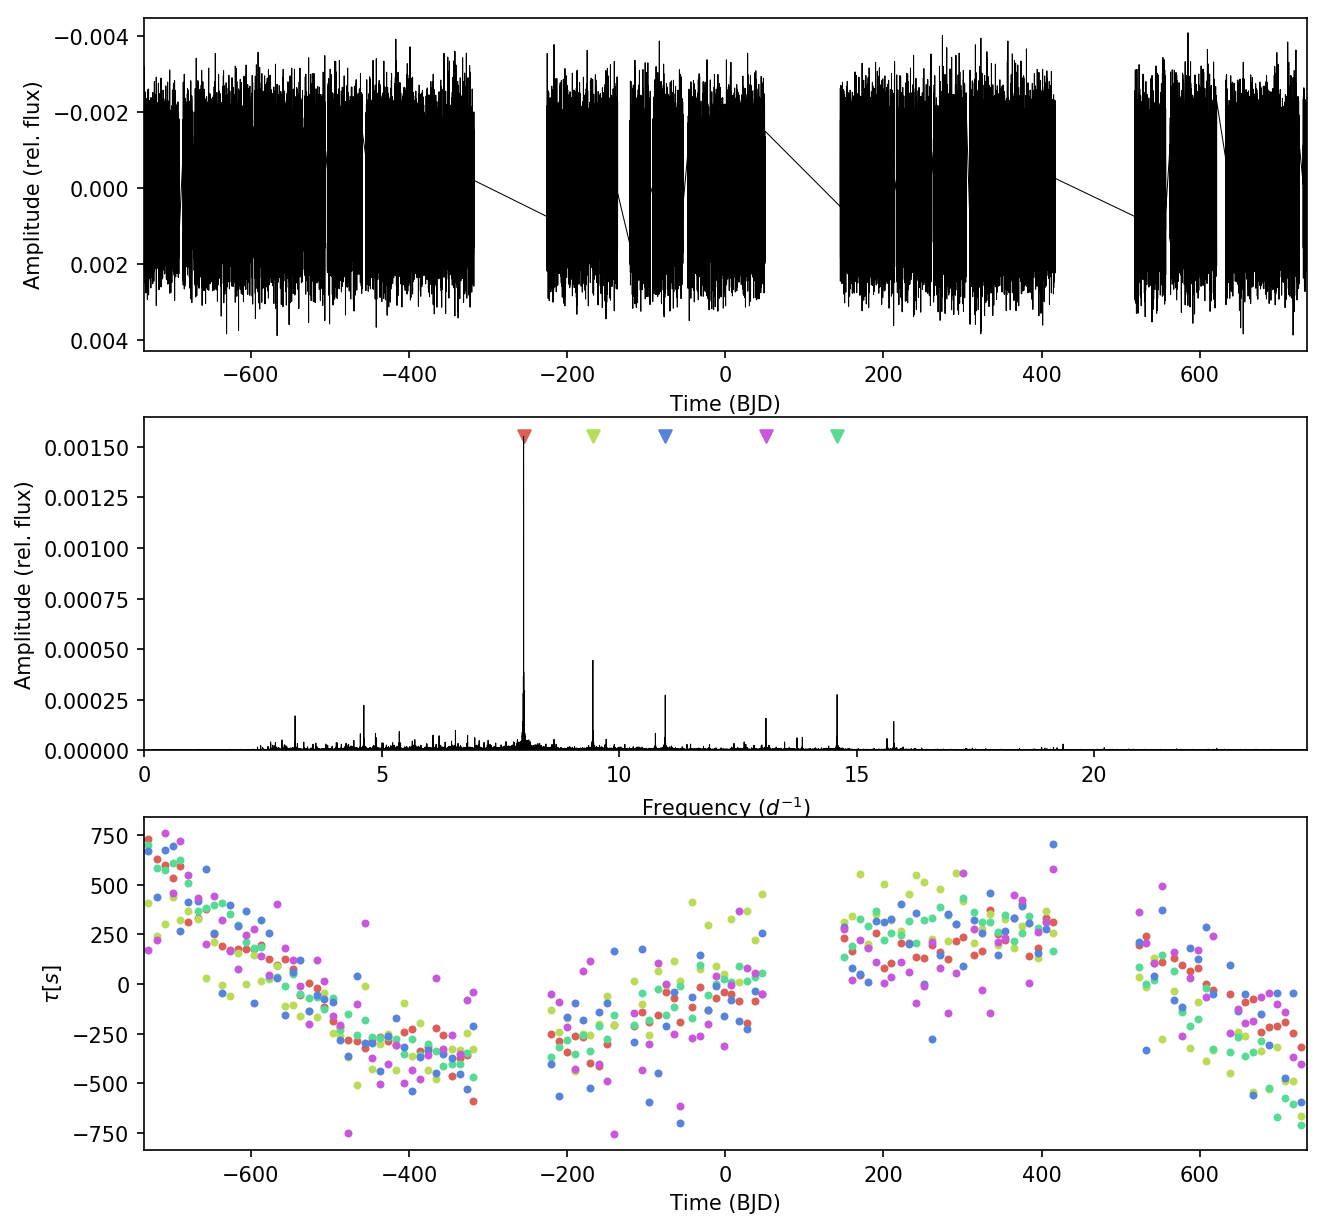

In [12]:
s_times, s_mags = np.loadtxt('/Users/danielhey/Downloads/kic4168574_appended-msMAP-gsmooth4x4x4_Q99_llc.txt', usecols=(0,1)).T

ms = maelstrom.Maelstrom(s_times, s_mags, fmin=5, fmax=24., max_peaks=5)
ms.setup_orbit_model(period=None)
ms.first_look()
plt.show()

In [13]:
opt = ms.optimize()

In [14]:
opt

{'logperiod': array(7.03767036),
 't0': array(475.46130496),
 'varpi_angle__': array([ 5.69607804e-05, -3.03895555e-04]),
 'eccen_interval__': array(-0.0782202),
 'logs': array(-7.54315128),
 'lighttime': array([378.55423567, 375.13417366, 432.65091888, 390.19755777,
        318.44266214]),
 'gammav': array(0.),
 'mean_flux': array(5.20435942e-09),
 'W_hat_cos': array([ 1.54667243e-03, -2.16157356e-04, -2.70791386e-04,  2.09001949e-04,
         3.90184844e-05]),
 'W_hat_sin': array([2.69423745e-04, 4.03655438e-04, 9.04554511e-05, 1.84273412e-04,
        1.55999269e-04]),
 'period': array(1138.73167955),
 'varpi': array(2.95630712),
 'eccen': array(0.48045531),
 'tref': array(572.14227061)}

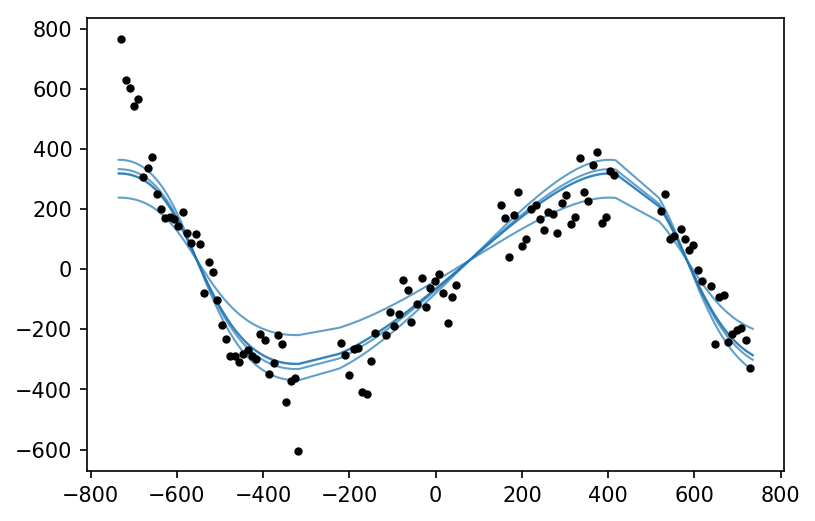

In [10]:
tau = ms.evaluate(ms.tau*86400)
plt.plot(time, tau - np.mean(tau), c="C0", alpha=0.7, lw=1)
a,b = ms.get_time_delay()
plt.plot(a,b[0], ".k")
plt.show()

In [15]:
pb1_model = ms.pin_orbit_model(opt)

In [12]:
opt

{'logperiod': array(7.03551214),
 't0': array(-410.60787523),
 'varpi_angle__': array([ 1.06306477e-04, -1.92948482e-05]),
 'eccen_interval__': array(-0.22489727),
 'logs': array(-7.01645658),
 'lighttime': array([369.39321796, 352.79847839, 351.3063784 , 407.45641552,
        254.06857129]),
 'gammav': array(0.),
 'mean_flux': array(2.58203436e-08),
 'W_hat_cos': array([ 1.54908451e-03, -2.15227626e-04,  2.10658893e-04, -2.68301263e-04,
         3.99656153e-05]),
 'W_hat_sin': array([2.64974082e-04, 4.05834588e-04, 1.81777088e-04, 9.30491314e-05,
        1.54401641e-04]),
 'period': array(1136.27669132),
 'varpi': array(-0.17954751),
 'eccen': array(0.44401259),
 'tref': array(-564.90343383)}

In [13]:
pb1_model['lighttime_a'].tag.test_value

329.4054766928559

In [21]:
ms[('t0', 'logs')]

KeyError: ('t0', 'logs')

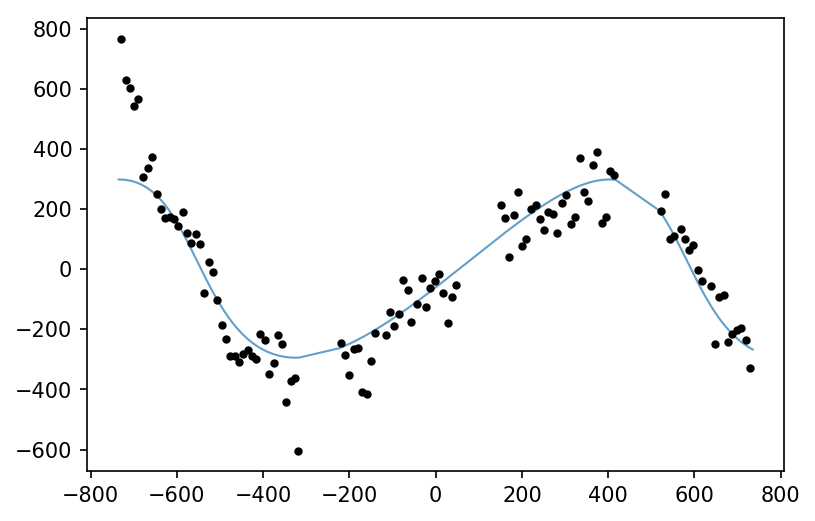

In [15]:
tau = pb1_model.evaluate(pb1_model.tau)*86400
plt.plot(time, tau - np.mean(tau), c="C0", alpha=0.7, lw=1)
a,b = ms.get_time_delay()
plt.plot(a,b[0], ".k")
plt.show()

In [9]:
opt = pb1_model.optimize()

success: False
initial logp: 265863.8395288766
final logp: 282243.6647502784
success: False
initial logp: 282243.6647502784
final logp: 291613.7692954569
success: True
initial logp: 291613.7692954569
final logp: 291904.68124193605
success: False
initial logp: 291904.68124193605
final logp: 292086.550931214
success: False
initial logp: 292086.550931214
final logp: 292108.63154215435
success: False
initial logp: 292108.63154215435
final logp: 292140.18869475246
success: True
initial logp: 292140.18869475246
final logp: 292141.31313626707
success: True
initial logp: 292141.31313626707
final logp: 292404.30437837966
success: False
initial logp: 292404.30437837966
final logp: 292471.8353542854
success: False
initial logp: 292471.8353542854
final logp: 292483.2563012404
success: False
initial logp: 292483.2563012404
final logp: 292567.1575881336


In [10]:
opt

{'PB1_logperiod': array(7.03780374),
 'PB1_t0': array(-419.90297028),
 'PB1_varpi_angle__': array([ 4.71881480e-04, -8.81606846e-05]),
 'PB1_eccen_interval__': array(-0.12935674),
 'PB1_logs': array(-7.01647994),
 'PB1_lighttime_a': array(382.10202025),
 'PB1_gammav': array(0.),
 'PB1_mean_flux': array(2.7298245e-08),
 'PB1_W_hat_cos': array([ 1.54830299e-03, -2.17047452e-04,  2.09706829e-04, -2.68346317e-04,
         3.79782083e-05]),
 'PB1_W_hat_sin': array([2.69738242e-04, 4.04855225e-04, 1.82998506e-04, 9.23047837e-05,
        1.55114625e-04]),
 'PB1_period': array(1138.88357106),
 'PB1_varpi': array(-0.18469872),
 'PB1_eccen': array(0.46770648),
 'PB1_tref': array(-566.77082056)}

In [11]:
trace = pb1_model.sample(tune=2000, draws=3000, chains=4, start=opt)

Sampling 4 chains:   5%|▍         | 10/208 [00:02<00:47,  4.21draws/s]


ValueError: Not enough samples to build a trace.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2e43a710>,
      dtype=object)

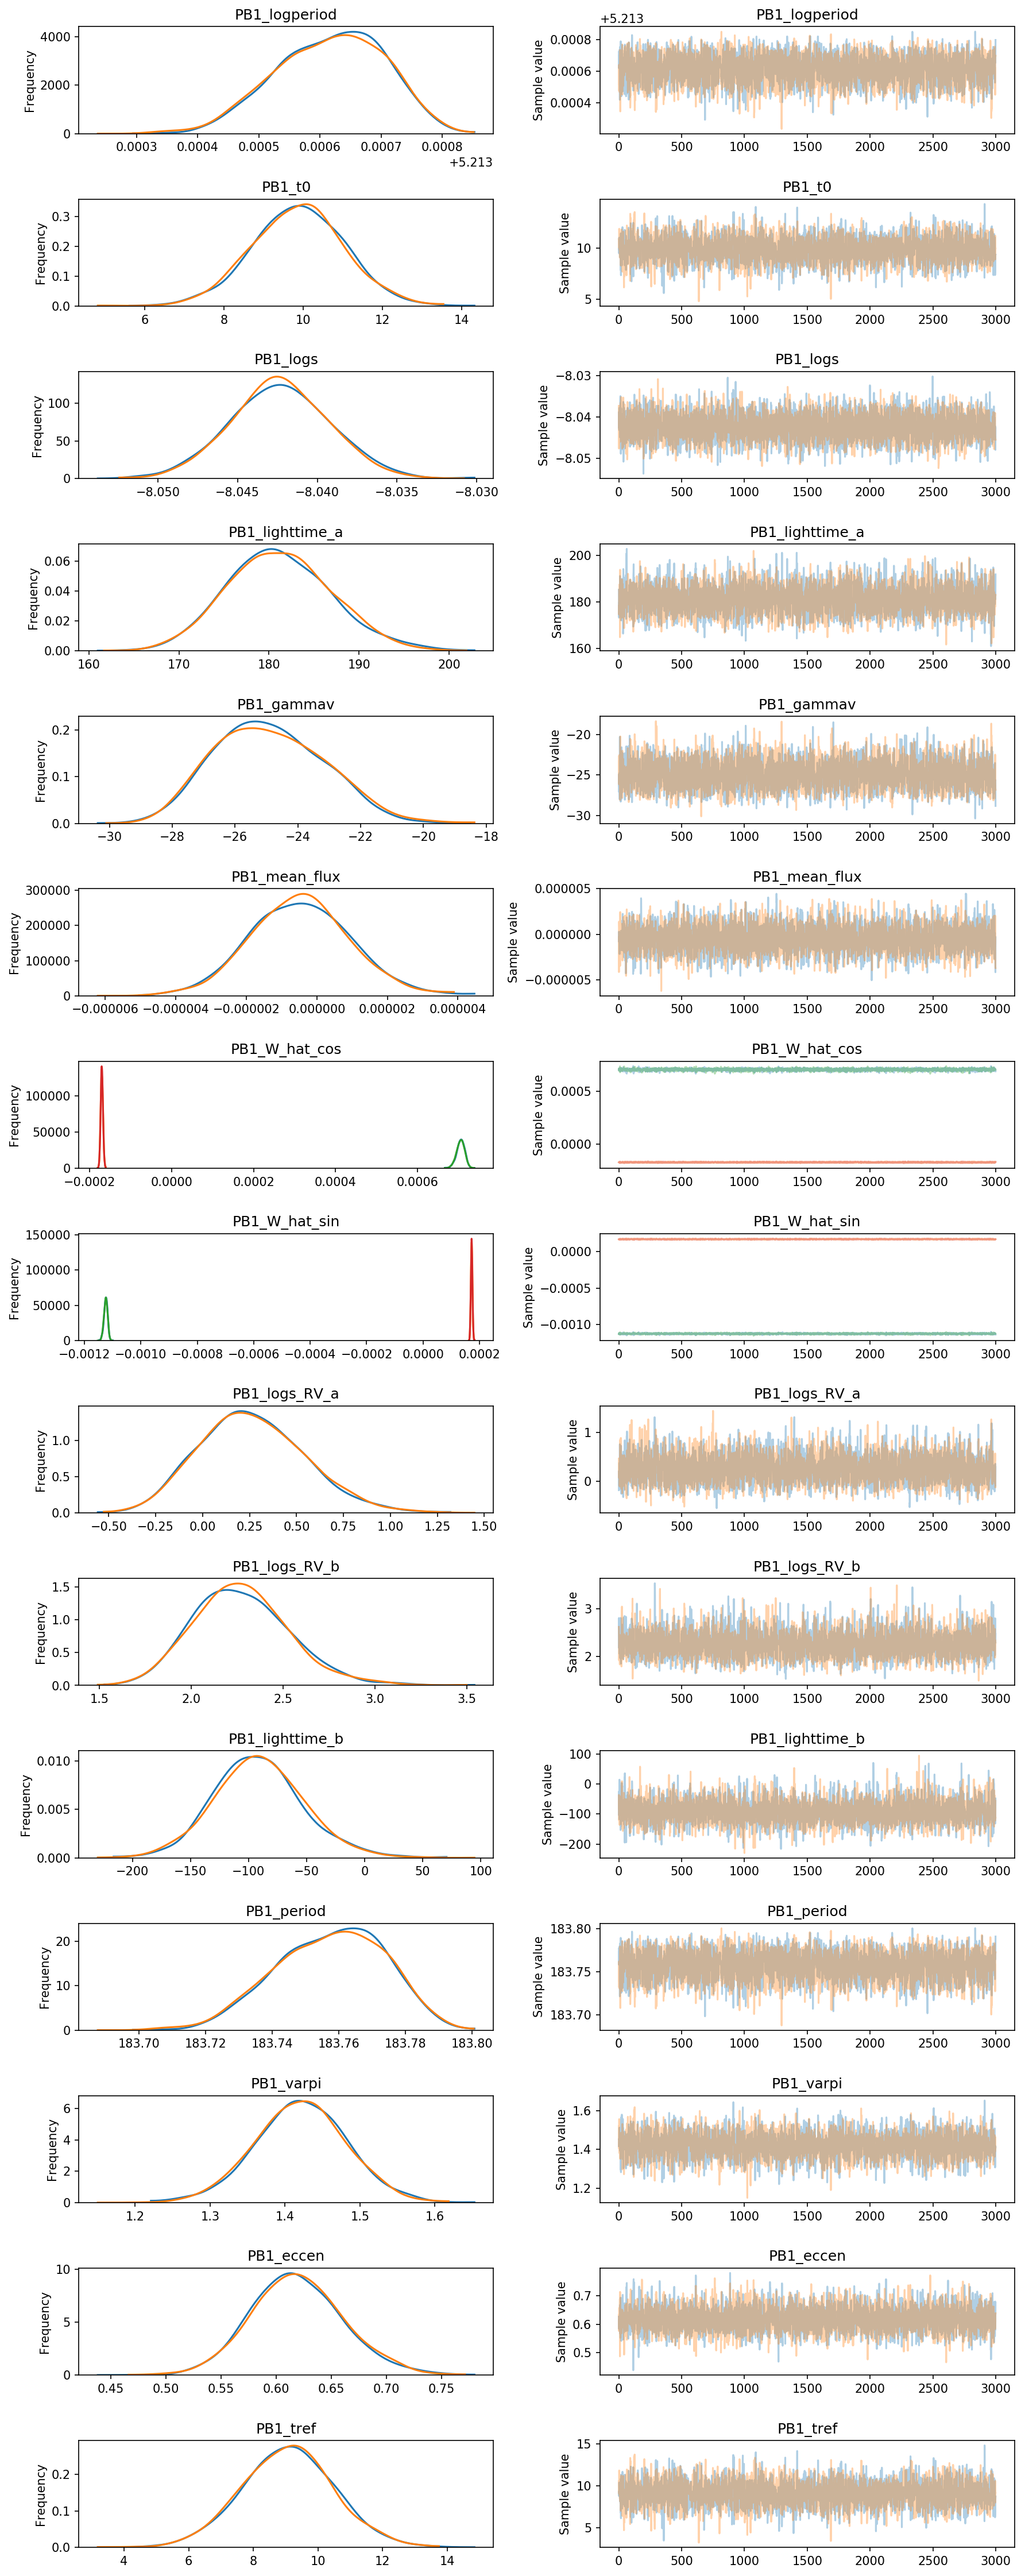

In [59]:
import pymc3 as pm
pm.traceplot(trace)

In [64]:
pm.summary(trace, varnames=["PB1_period", "PB1_lighttime_a","PB1_lighttime_b","PB1_t0","PB1_varpi", "PB1_eccen", "PB1_logs"])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
PB1_period,183.757464,0.016129,0.000326,183.726373,183.786282,2483.780898,1.000096
PB1_lighttime_a,181.184524,5.752997,0.083302,170.396216,192.775126,4062.716217,0.999856
PB1_lighttime_b,-90.938103,38.208675,0.688296,-169.111769,-16.721652,3263.193617,0.999976
PB1_t0,9.876238,1.160688,0.018115,7.604177,12.174410,3006.541594,1.000089
PB1_varpi,1.421391,0.060494,0.001014,1.296775,1.534988,2745.814703,1.000154
PB1_eccen,0.619381,0.041155,0.000615,0.541408,0.704733,3940.601266,1.000075
PB1_logs,-8.042324,0.003070,0.000040,-8.048272,-8.036276,5004.327685,0.999855


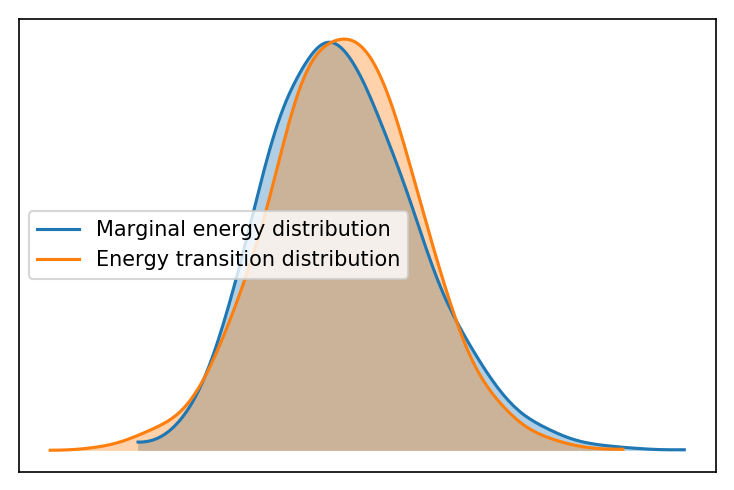

In [71]:
pm.energyplot(trace)

In [1]:
pm.densityplot(trace)

NameError: name 'pm' is not defined

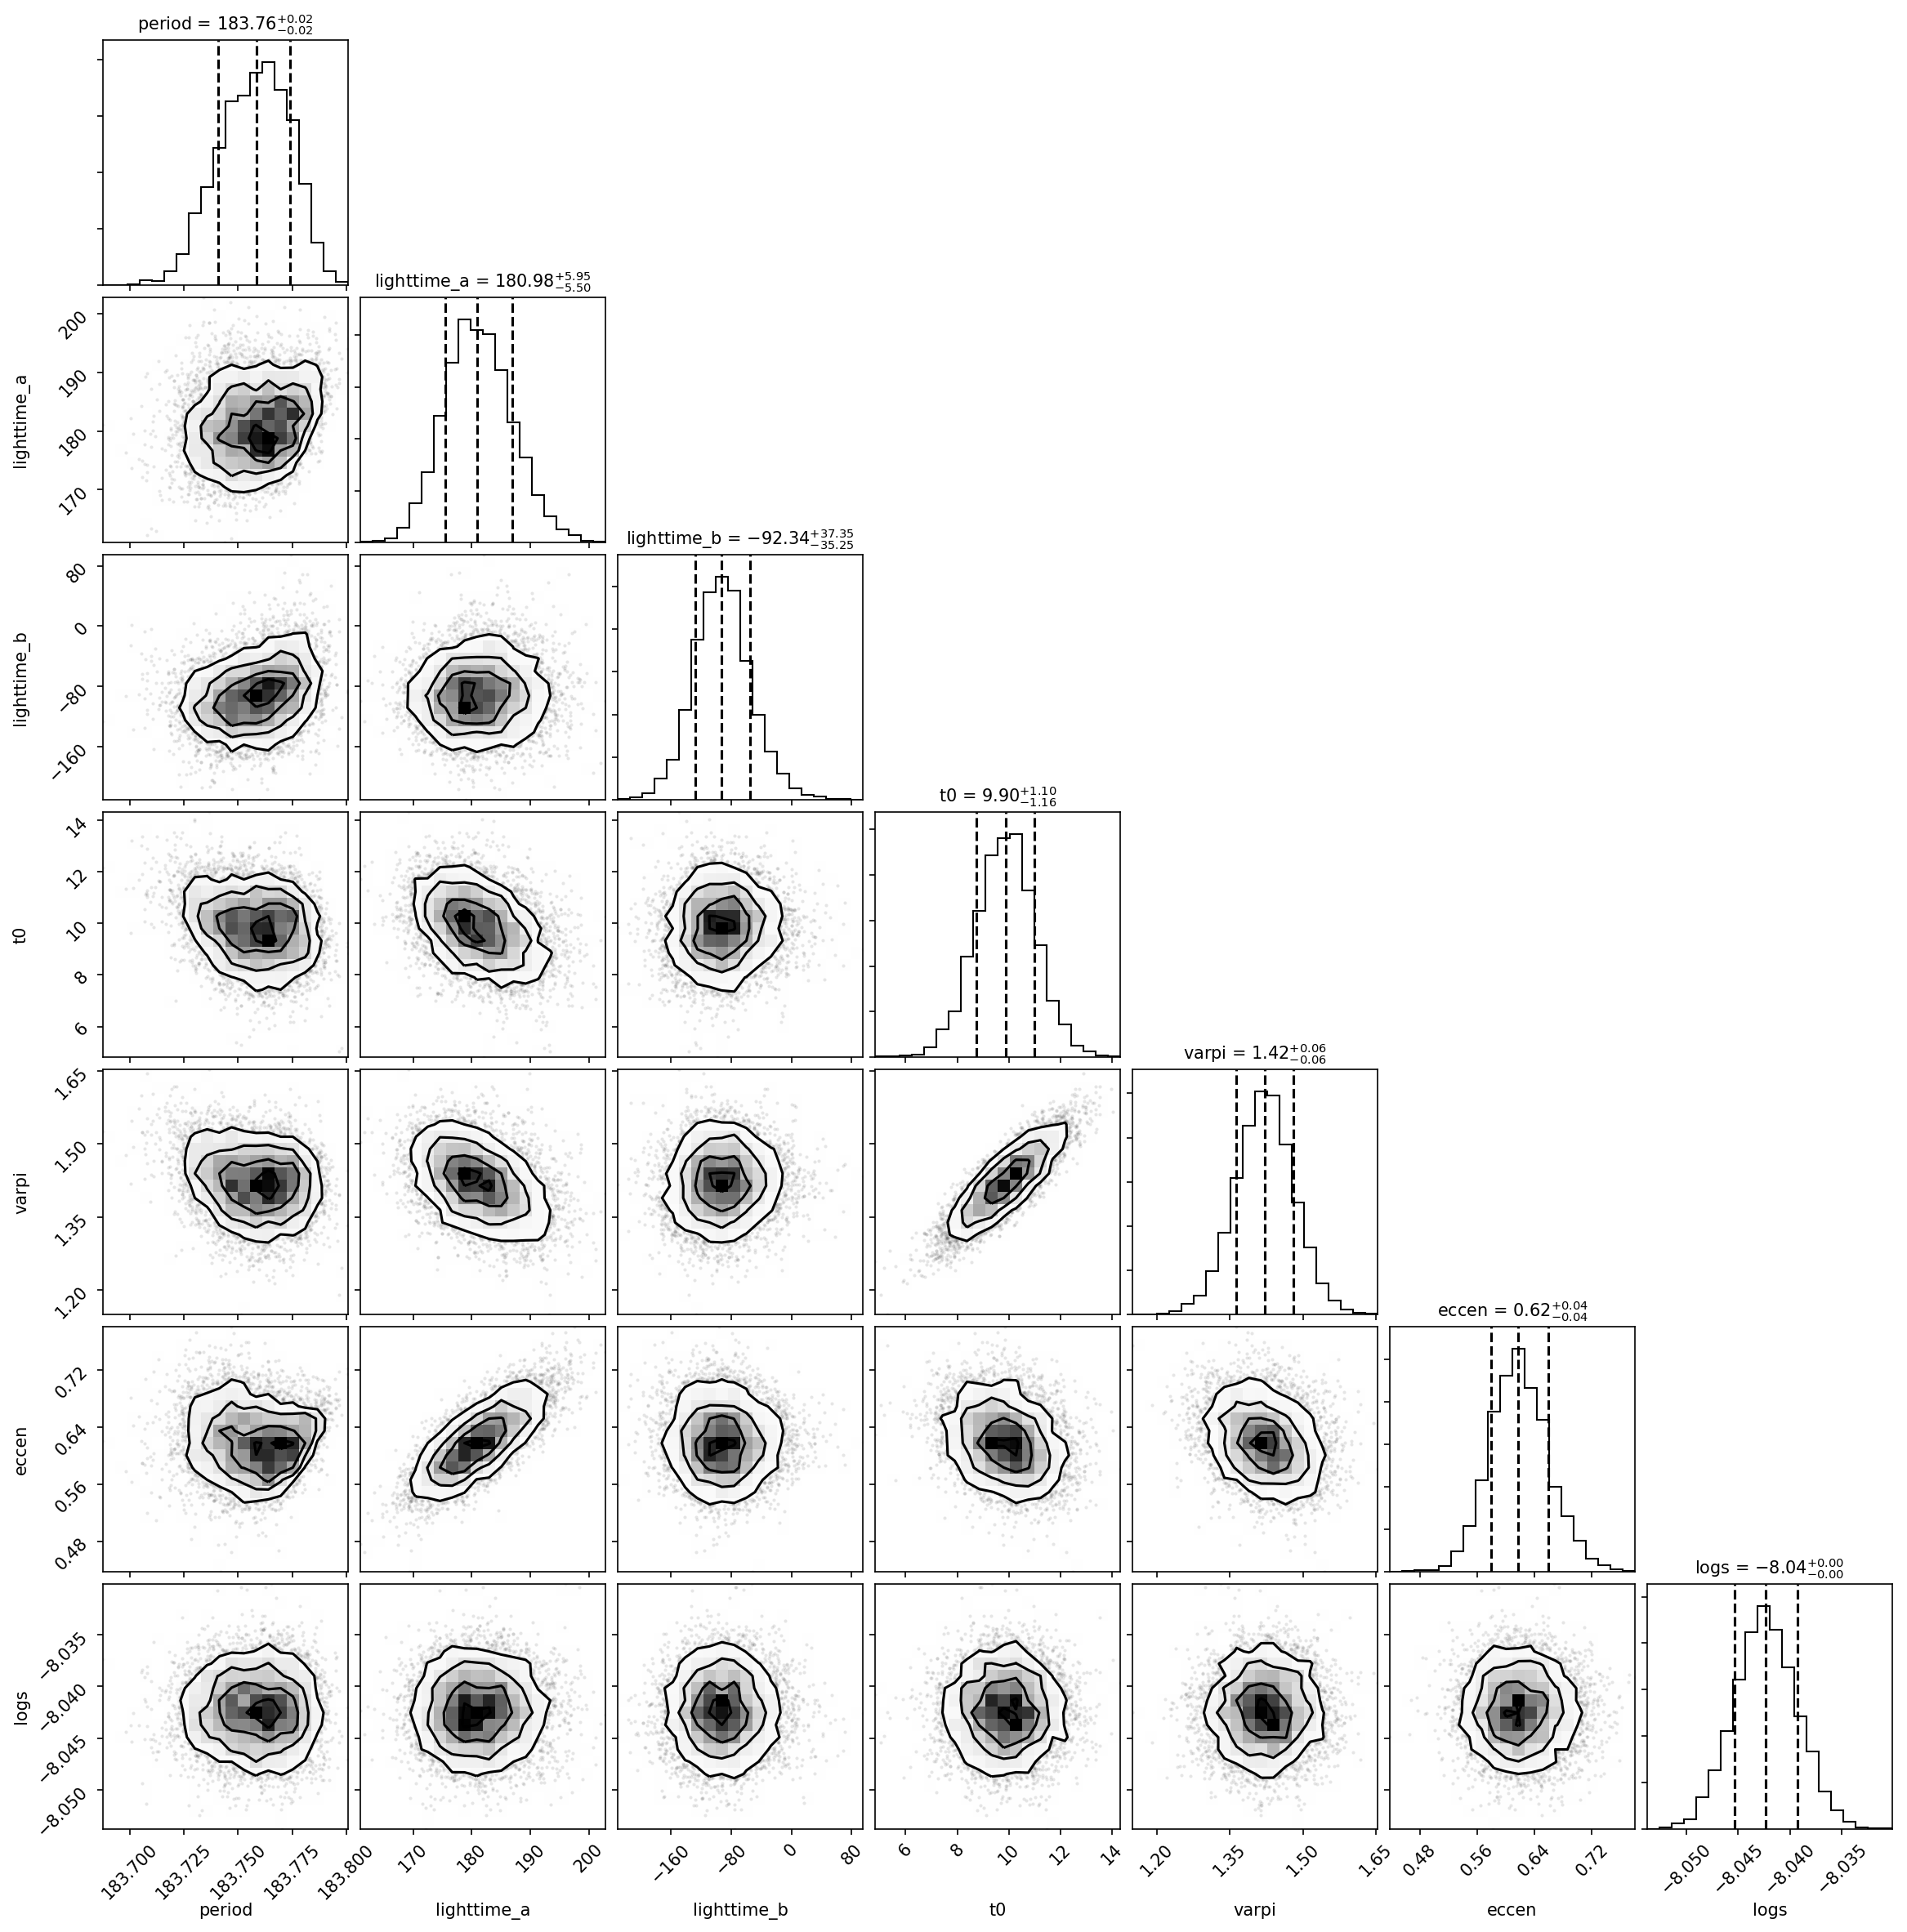

In [70]:
import corner
varnames=["PB1_period", "PB1_lighttime_a","PB1_lighttime_b","PB1_t0","PB1_varpi", "PB1_eccen", "PB1_logs"]
samples = pm.trace_to_dataframe(trace, varnames=varnames)
for k in samples.columns:
    if "_" in k:
        samples[k.replace("PB1_", "")] = samples[k]
        del samples[k]
corner.corner(samples,
              quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 10})
plt.savefig('corner.png')